# Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv(r'E:\Data Science Certificates\practice project\Advertising Sales Channel Prediction\Advertising.csv')
df               

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
# As we can see there are two indexing showing hence we will drop Unnamed one and keep python defaoult on as it is.

df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Now looks good

In [10]:
df.shape

(200, 4)

We have 200 rows and 4 colums

In [11]:
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Looking at the sales target column we are getting idea about targets and they are countineus. Lets explore more

In [12]:
df.tail(5)

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [13]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [14]:
# we dont have any null values in data set

In [15]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [16]:
# all are floats which is acceptable and we dont need to use any encoding here

In [17]:
df.memory_usage()

Index         128
TV           1600
radio        1600
newspaper    1600
sales        1600
dtype: int64

In [18]:
# Memory usage is also very low as we dont have high valume data set

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
# Total memory use is 6.4 KB only

Checking unique values in target column "sales"

In [21]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [22]:
# Again we can see these are countineus value and regression problem

In [23]:
df['sales'].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

In [24]:
#Lets check if there is any space present in data set or not

df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


So no space present in data set

# EDA

<AxesSubplot:xlabel='TV', ylabel='sales'>

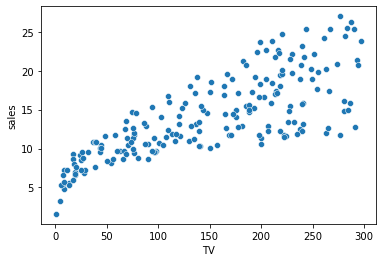

In [25]:
sns.scatterplot(data=df,x="TV",y="sales")

As we can observe from above chart that more we invest in TV advertising more our sales is increasing

<AxesSubplot:xlabel='radio', ylabel='sales'>

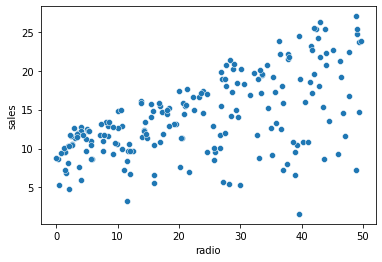

In [26]:
sns.scatterplot(data=df,x="radio",y="sales")

In above chart we can see little postive raltion between radio and sales however I can also observe that even sales is less if we see radio count between 40 to 50 that means some times it is not that much benificial to advertise through radio becasue now a days radio user are very low

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

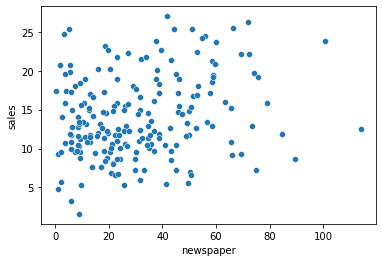

In [27]:
sns.scatterplot(data=df,x="newspaper",y="sales")

Again here in newspaper it shows that good as compare to radio

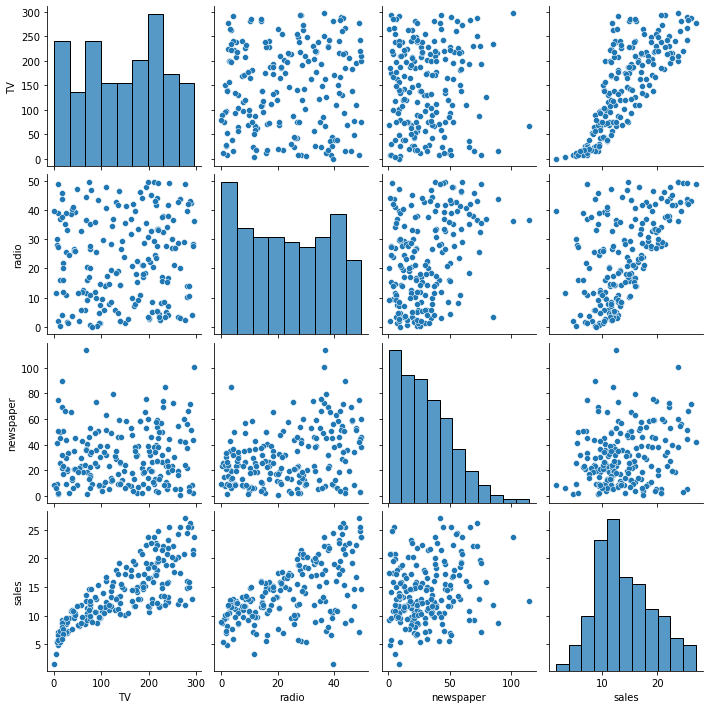

In [28]:
sns.pairplot(df)

We can observe from above plot realtion of all variable with each other. where I can see TV is most effectiive advertisment channle 

In [29]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

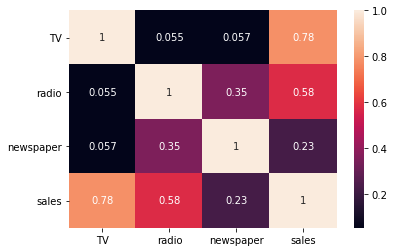

In [30]:
# Lets plot correlation on heatmap to get better visualisation

sns.heatmap(df.corr(),annot=True)

So we can see that TV has highest positive correlation radion is on second rank and newspaper is having lowest impact.

In [31]:
# Lets do some statistical analysis

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


from above data we can see that "TV" has good distributed data and news paper data is highlyy spreaded one.   

In [33]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Skeness is present in data sent +/- 0.5

As per above threshold newspaper and has skewness present which we need to treat

<AxesSubplot:xlabel='TV', ylabel='Density'>

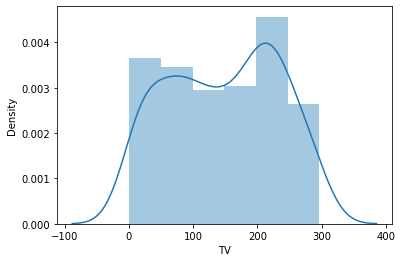

In [34]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

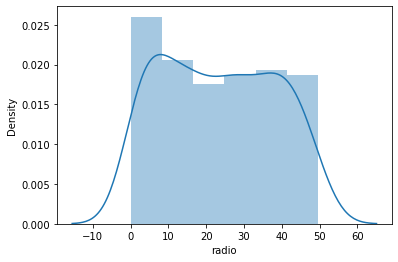

In [35]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

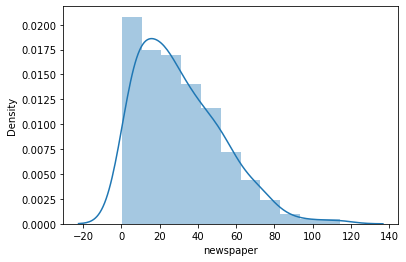

In [36]:
sns.distplot(df["newspaper"])

<AxesSubplot:xlabel='sales', ylabel='Density'>

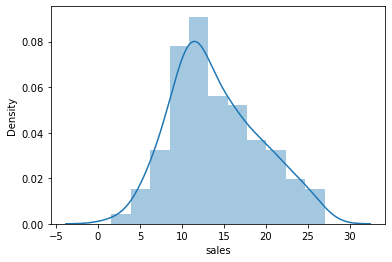

In [37]:
sns.distplot(df["sales"])

By looking at above graps we are still at the same conclusion as we did erlier Newespaper has skewness. sales also have but sales is our target column

# Cheking outliers

<AxesSubplot:>

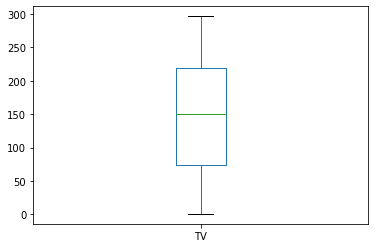

In [38]:
df['TV'].plot.box()

<AxesSubplot:>

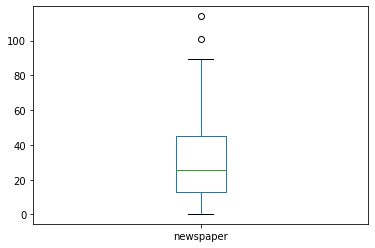

In [39]:
df['newspaper'].plot.box()

<AxesSubplot:>

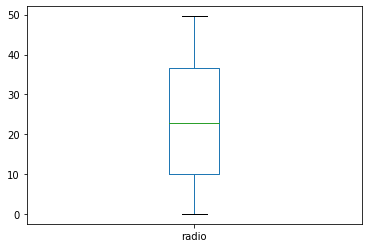

In [40]:
df['radio'].plot.box()

We have outliers only in newspaper we will see how much data loss will happen and accordingly will take decision

In [41]:
# taking 3 as threshold
from scipy.stats import zscore
zscore = zscore(df)
zabs = np.abs(zscore)

z = df[(zabs<3).all(axis=1)] 


In [42]:
z.shape

(198, 4)

It is cleary showing not much data loss but we will got with flow

In [43]:
df.shape

(200, 4)

In [44]:
# calculating Dataloss in the data set %

loss = (200-198)/200*100
loss

1.0

In [45]:
# 1% loss is acceptable

In [46]:
dropindex = df.index.difference(z.index)
dropindex

Int64Index([16, 101], dtype='int64')

In [47]:
df.drop(dropindex,inplace = True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


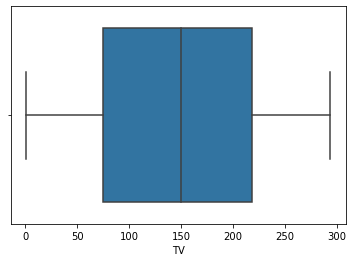

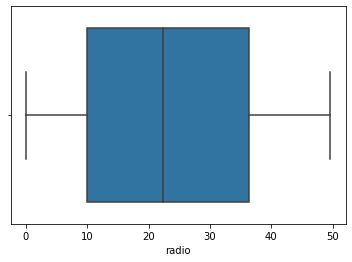

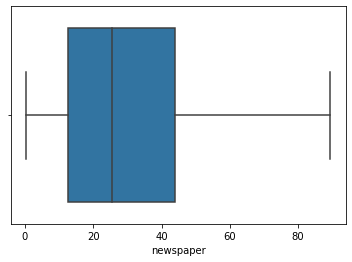

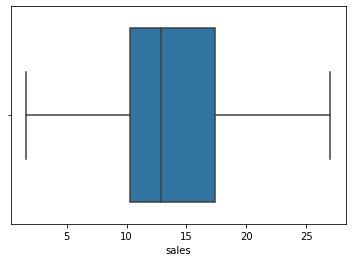

In [48]:
col2=['TV','radio','newspaper','sales']

for i, col2 in enumerate(df[(col2)]):
    plt.figure(i)
    sns.boxplot(df[col2])

As we can see above outliers are removed now

In [49]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [50]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [51]:
x.shape

(198, 3)

In [52]:
y.shape

(198,)

We have defined our x and y data where y is our target variable and then we have checked shape of both if they are equal are not

In [53]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

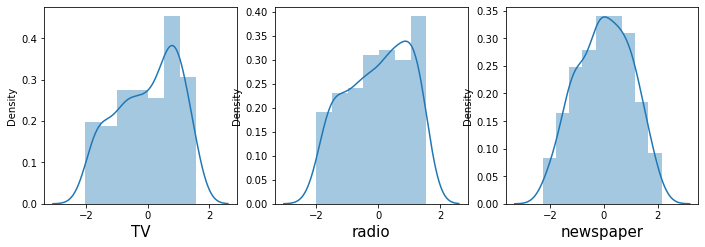

In [54]:
col1=['TV','radio','newspaper']

new_x=pd.DataFrame(data=x,columns=col1)

plt.figure(figsize=(20,21),facecolor='white')

plotn=1

for col in new_x:
    if plotn<=4:
        plt.subplot(5,5,plotn)
        sns.distplot(new_x[col])
        plt.xlabel(col,fontsize=15)
        
    plotn+=1   
    
plt.show() 

Checked skewness after removing it and we can see that skewness removed now

In [55]:
from sklearn.preprocessing import StandardScaler

stc=StandardScaler()
x=stc.fit_transform(x)

x

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

data was looking good however still I preferred to scalled data so that there will no chnaces of any bias. so I have scaled data above with standered scaller

In [68]:
#Lets import some neccessary modules now

import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Finding best random state

In [69]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.9894370942380599 on Random State: 81


We found out best random state which is 81 where we are getting almost 98% accuracy score.

Lets go further to test multiple module to find out best one

In [70]:
dt=DecisionTreeRegressor()
kn=KNeighborsRegressor()
adb=AdaBoostRegressor()
gdb=GradientBoostingRegressor()
lnr=LinearRegression()
rfr=RandomForestRegressor()
sv=SVR()

model=[dt,kn,adb,gdb,lnr,rfr,sv]

for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=81)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("RMSE Score is:",mean_squared_error(y_test,predi))
    r2 = r2_score(y_test, predi)*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(i, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)
    print("*****************************************************************")

performance matrix of DecisionTreeRegressor() is:
RMSE Score is: 0.8600000000000001
R2 Score is: 97.23462887754873
Cross Validation Score: 95.10449532930275
R2 Score - Cross Validation Score is 2.130133548245979
*****************************************************************
performance matrix of KNeighborsRegressor() is:
RMSE Score is: 1.4751499999999997
R2 Score is: 95.25658463804186
Cross Validation Score: 94.3486345366393
R2 Score - Cross Validation Score is 0.9079501014025624
*****************************************************************
performance matrix of AdaBoostRegressor() is:
RMSE Score is: 0.8286239847118505
R2 Score is: 97.33551995500854
Cross Validation Score: 95.66282735040262
R2 Score - Cross Validation Score is 1.6726926046059134
*****************************************************************
performance matrix of GradientBoostingRegressor() is:
RMSE Score is: 0.38453184877173424
R2 Score is: 98.76351945319051
Cross Validation Score: 97.82358237459476
R2 Score 

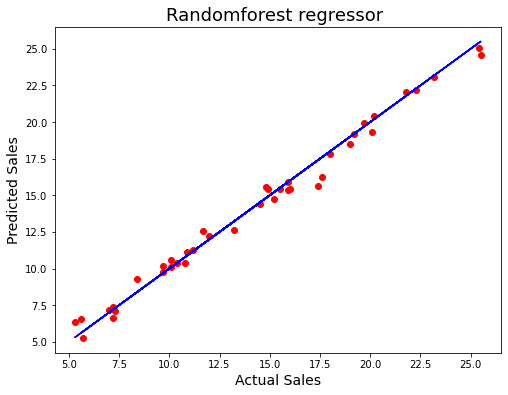

In [78]:
predlr=rfr.predict(x_test)

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Randomforest regressor ',fontsize=18)
plt.show()

In [84]:
import joblib
filename = "Advertise FinalModel.pkl"
joblib.dump(rfr, filename)

['Advertise FinalModel.pkl']

In [85]:
model = joblib.load("Advertise FinalModel.pkl")
print(model.predict(x_test))

[14.655  7.412 23.129  7.289  6.428 22.331 11.106 15.405  9.977 12.671
 20.039 22.101  9.756 25.128 10.511  9.345 24.678 11.228 19.307 15.668
 20.29  18.427 10.548 16.434  7.013 15.203 14.615 15.559 10.151 12.78
  7.524  6.526 15.302  4.939 10.582 17.853 12.264 19.373 15.97  15.35 ]


In [86]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,14.5,14.655
1,7.0,7.412
2,23.2,23.129
3,7.3,7.289
4,5.3,6.428
5,21.8,22.331
6,11.2,11.106
7,15.5,15.405
8,10.1,9.977
9,11.7,12.671


# So predicated and original value match up to 99 % percent.